In [1]:
from ppsim import Simulation
%matplotlib widget

In [2]:
a, b, u = 'A', 'B', 'U'
approximate_majority = {
    (a,b):(u,u),
    (a,u):(a,a),
    (b,u):(b,b)
}
n = 10 ** 9
sim = Simulation({a: n // 2, b: n // 2}, approximate_majority)

In [3]:
from ppsim import StatePlotter
sp = StatePlotter()
sim.add_snapshot(sp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
sim.run()
sim.snapshot_slider()

interactive(children=(IntSlider(value=0, description='index', layout=Layout(width='100%'), max=60), Output()),…

In [18]:
sim.run(1, 0.1)
sim.history

,A,B,U
time,,,
0.000000,500000000,500000000,0
1.000010,379927222,379906395,240166383
2.000010,349098811,349065460,301835729
3.000036,338995533,338948434,322056033
4.000069,335417565,335369545,329212890
5.000078,334132148,334053310,331814542
6.000102,333658269,333556029,332785702
7.000117,333518625,333353906,333127469
8.000119,333482691,333265012,333252297


In [5]:
sim.history.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='time'>

In [4]:
sim.run()

In [14]:
sim.run()

In [7]:
approximate_majority_variant = {
    (a, b): (a, u),
    (b, a): (b, u),
    (a, u): (a, a),
    (b, u): (b, b)
}
# Simulation({a: n //2, b: n // 2}, approximate_majority_variant).print_reactions()
Simulation({a: n //2, b: n // 2}, approximate_majority_variant, transition_order='symmetric_enforced').print_reactions()

ValueError: Asymmetric interaction:
                                            ('A', 'B') -> ('A', 'U')
                                            ('B', 'A') -> ('B', 'U')

In [ ]:
sim

In [8]:
from ppsim import time_trials
import numpy as np

ns = [int(n) for n in np.geomspace(10, 10 ** 8, 20)]
def initial_condition(n):
    return {'A': n // 2, 'B': n // 2}
df = time_trials(approximate_majority, ns, initial_condition, num_trials=100, max_wallclock_time = 30)

  0%|          | 0/20 [00:00<?, ?it/s]

In [9]:
df

,n,time
0,10,7.000000
1,10,7.400000
2,10,5.400000
3,10,15.100000
4,10,5.900000
...,...,...
1524,100000000,50.273655
1525,100000000,50.440260
1526,100000000,56.497314
1527,100000000,51.880454


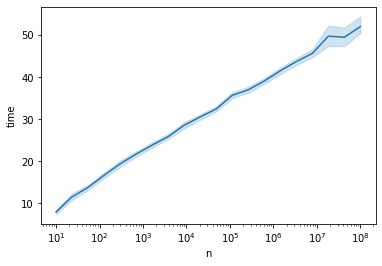

In [10]:
import seaborn as sns
import matplotlib as plt
a = sns.lineplot(x='n', y='time', data=df)
a.set_xscale('log')
# plt.xscale('log')

In [23]:
from math import ceil, floor

def discrete_averaging(a, b):
    avg = (a + b) / 2
    return floor(avg), ceil(avg)

n = 10 ** 8
sim = Simulation({0: n // 2, 100: n // 2}, discrete_averaging)

In [24]:
sp = StatePlotter()
sim.add_snapshot(sp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [34]:
sp.ax.tick_params(axis='x', labelsize=5)

In [36]:
sp.ax.set_yscale('linear')

In [28]:
sim.run(20, 0.1)
sim.snapshot_slider()

interactive(children=(IntSlider(value=0, description='index', layout=Layout(width='100%'), max=200), Output())…

In [12]:
sp.ax.set_yscale('symlog')

In [28]:
sim.snapshots[0].ax.set_yscale('symlog')

In [13]:
sim.run()

In [18]:
sim.history

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
time,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,500000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,500000000
1.000067e+00,119270875,823520,1166625,5446071,2497691,2665469,17312945,8181000,5074008,9605471,...,9606911,5072745,8184406,17303573,2658181,2493866,5446067,1168722,823979,119275925
2.001296e+00,17976311,334331,551387,1900610,1416207,1876790,5849469,4419008,4728875,7078539,...,7084169,4728981,4418572,5846420,1875601,1416376,1903665,551621,333487,17978124
3.002960e+00,2464698,52675,91010,303162,254998,366882,1014449,918876,1150811,1800103,...,1799786,1153656,917635,1014660,365621,254239,301862,91255,52671,2462578
4.005906e+00,332228,7320,12534,41964,35754,52923,145019,137969,182867,300720,...,301860,183338,137560,143933,52961,35938,41344,12828,7167,331215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.347354e+07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.358760e+07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.028421e+07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def self_stabilizing_clock(a, b, m, p=1):
    # states a, b in (0, ..., m-1, 'N')
    if a in range(m) and b in range(m):
        # drip reaction
        if a == b:
            return {((a + 1) % m, b): p}
        # epidemic reaction
        elif (a + 1) % m == b:
            return b, b
        elif (b + 1) % m == a:
            return a, a
        # clipping reaction
        else:
            return 'N', 'N'
    # recovery epidemic reactions
    elif a == 'N':
        return b, b
    elif b == 'N':
        return a, a
    
m = 12
n = 10 ** 9
sim = Simulation({i: n // m for i in range(m)}, self_stabilizing_clock, m=m)
sim.add_snapshot(StatePlotter())
sim.add_snapshot(HistoryPlotter())